In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime, date 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance


#Logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.pipeline import make_pipeline

import sklearn
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from scipy.stats import lognorm
from scipy.stats import norm

In [16]:
df = pd.read_csv('site1.csv')

In [17]:
df

,Time,Riverflow
0,1976/1/1,0.542
1,1976/1/2,3.979
2,1976/1/3,1.407
3,1976/1/4,0.938
4,1976/1/5,1.554
...,...,...
14513,2015/9/26,0.274
14514,2015/9/27,0.251
14515,2015/9/28,0.262
14516,2015/9/29,0.151


In [18]:
df[df['Riverflow'] > 29]

,Time,Riverflow
3551,1985/9/21,36.97
5392,1990/10/6,34.67
6343,1993/5/14,33.57
8882,2000/4/26,65.40
9076,2000/11/6,31.13
9077,2000/11/7,33.28


In [5]:
df = df.fillna(0)
df = df.drop(df[df['Riverflow']==0].index)

In [6]:
sample = df['Riverflow']

In [7]:
sigma,loc,mean = lognorm.fit(sample,floc=0)
#x = np.linspace(sample.min(),sample.max(),5000)
x = np.array(sorted(sample))
mean = 1.34
sigma = 0.8

In [8]:
print("scatter for data is " ,sigma)
print( "mean of data is ",mean )

scatter for data is  0.8
mean of data is  1.34


In [9]:
dist=lognorm([sigma],loc=mean)

In [10]:
a = [0.31,0.478,0.741,2.865,4.16]
y = [0.05,0.3,0.5,0.9,0.95]

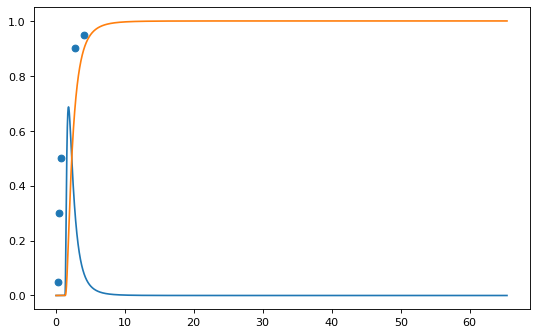

In [11]:
import pylab as pl
pl.scatter(a, y, alpha=1)
pl.plot(x,dist.pdf(x))
pl.plot(x,dist.cdf(x))

In [12]:
maximum = max(dist.pdf(x))
maximum

0.6867429482849301

In [7]:
df_hr = pd.read_csv('df_hr.csv')

In [8]:
df_hr['CSOspills']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87678    0.0
87679    0.0
87680    0.0
87681    0.0
87682    0.0
Name: CSOspills, Length: 87683, dtype: float64

In [9]:
df_cso = df_hr['CSOspills']

In [10]:
df_csonozero = df_cso.drop(df_cso[df_cso==0].index)

In [11]:
df_csonozero

23         1.38450
177        0.30000
190        9.51540
191       29.68590
351      331.83195
           ...    
87560      4.27050
87580     60.84435
87581     87.97095
87638     27.07350
87639     12.22080
Name: CSOspills, Length: 1659, dtype: float64

In [18]:
x = np.array(sorted(df_csonozero))
#x = np.array(df_csonozero)

In [19]:
x

array([8.39250000e-02, 1.50000000e-01, 1.50000000e-01, ...,
       1.16717775e+03, 1.17489450e+03, 1.20683295e+03])

In [20]:
x_list = list(x)

In [21]:
pos = x_list.index(0.30000)
pos

46

In [22]:
mu = np.mean(x)
sigma = 1

In [23]:
print(mu)

190.99556446654609


In [24]:
#sigma_cso,loc_cso,mean_cso = norm.fit(df_hr['CSOspills'],floc=0)
#x = np.linspace(sample.min(),sample.max(),5000)
#dist_cso=norm([sigma_cso],loc=mean_cso)

In [25]:
sigma,loc,mu = lognorm.fit(df_csonozero,floc=0)
pList=lognorm([sigma],loc=mu)

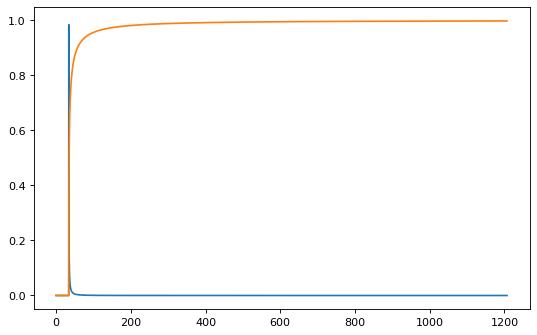

In [27]:
pl.plot(x,pList.pdf(x))
pl.plot(x,pList.cdf(x))

In [28]:
pList.pdf(34.133)

array([0.97659361])

In [29]:
pList.pdf(1000)

array([3.29872677e-06])

In [49]:
peak_cso = max(pList.pdf(x))
peak_cso

0.9844299496767641

In [50]:
def cso_peak(peak_cso):
    x = 0
    for i in np.arange(0.0,100.0,0.001):
        if -0.01 <= pList.pdf(i) - peak_cso <= 0.01:
            x = round(i,3)
    return x

In [51]:
cso_peak(peak_cso)

34.133

In [52]:
def find_max(maximum):
    x = 0
    for i in np.arange(0.0,100.0,0.1):
        if -0.01 <= dist.pdf(i) - maximum <= 0.01:
            x = round(i,2)
    return x

In [53]:
peak = find_max(maximum)
peak

1.9

In [54]:
dist.pdf(1.9)

array([0.68480269])

In [32]:
def function(cso,sigma,n,peak):
    cso = round(cso,2)
    cso_list = df_hr['CSOspills']
    cso_nonzero = cso_list.drop(cso_list[cso_list==0].index)
    cso_sorted = np.array(sorted(cso_nonzero))
    upper_bound = cso + 0.05
    lower_bound = cso - 0.05
    list_rf = []
    for i in cso_sorted:
        if i > upper_bound or i < lower_bound:
            lower_bound = lower_bound - 0.05
            upper_bound = upper_bound + 0.05
        else:
            cso_sorted_list = list(cso_sorted)
            pos = cso_sorted_list.index(i)
            percent = pList.pdf(cso)
            str_per = str(percent)
            decimal = len(str_per[str_per.find('.') + 1:])
            if cso >= 34.212:
                for k in np.arange(peak,60.0,0.1):
                    prob =  round(np.float(dist.pdf(k)),decimal)
                    if -5/(10**decimal) <= prob - percent <= 5*(10**decimal):
                        list_rf.append(k)
            else:
                for k in np.arange(0.0,peak,0.1):
                    percent = round(pos/len(cso_sorted_list),6)
                    prob =  round(np.float(dist.pdf(k)),6)
                    if -0.05 <= prob - percent <= 0.05:
                        list_rf.append(k)
    mean_rf = np.mean(list_rf)
    upper_rf = mean_rf + 1.96 * sigma/np.sqrt(n)
    lower_rf = mean_rf - 1.96 * sigma/np.sqrt(n)
    maxrf = round(max(list_rf),1)
    minrf = round(min(list_rf),1)
    #print('The mean river-flow is',round(mean_rf,4),'m3/s, and the confidence interval with level 95% is (',round(lower_rf,4),',',round(upper_rf,4),').')
    #if minrf < maxrf:
        #print('Max ', maxrf,'Min ', minrf)
    #else:
        #print('Max ', maxrf,'Min ', 0.0)
    return mean_rf,maxrf,minrf

In [12]:
df_hr_nonzero = pd.read_csv('df_hr_nonzero.csv')

In [34]:
from scipy import stats

In [47]:
def probability(cso):
    rf_05 = 0
    rf_10 = 0
    rf_20 = 0
    rf_50 = 0
    rf_90 = 0
    sigma = 1
    mean = function(cso,0.8,1659,1.9)[0]
    dist_new=lognorm([sigma],loc=mean)
    x=np.linspace(0,40,1659)
    #pl.plot(x,dist_new.pdf(x))
    #pl.plot(x,dist_new.cdf(x))
    for i in np.arange(0,40,0.001):
        if -0.01 <= dist_new.cdf(i) - 0.95 <= 0.01 :
            rf_05 = i
        if -0.01 <= dist_new.cdf(i) - 0.90 <= 0.01 :
            rf_10 = i
        if -0.01 <= dist_new.cdf(i) - 0.80 <= 0.01 :
            rf_20 = i  
        if -0.01 <= dist_new.cdf(i) - 0.50 <= 0.01 :
            rf_50 = i
        if -0.01 <= dist_new.cdf(i) - 0.10 <= 0.01 :
            rf_90 = i
    #print('Probability of exceedance ',round(rf_05,3),'m3/s is ','5%')
    #print('Probability of exceedance ',round(rf_10,3),'m3/s is ','10%')
    #print('Probability of exceedance ',round(rf_20,3),'m3/s is ','20%')
    #print('Probability of exceedance ',round(rf_50,3),'m3/s is ','50%')
    #print('Probability of exceedance ',round(rf_90,3),'m3/s is ','90%')
    return rf_05,rf_10,rf_20,rf_50,rf_90

In [56]:
def plot_show(cso):
    max_value = function(cso,0.8,1659,1.9)[1]
    min_value = function(cso,0.8,1659,1.9)[2]
    mean_value = function(cso,0.8,1659,1.9)[0]
    p1 = [1, function(1,0.8,1659,1.9)[0]] 
    p2 = [1200, function(1200,0.8,1659,1.9)[0]] 
    #plt.plot([1,1200],[function(1,0.8,1659,1.9)[0],function(1200,0.8,1659,1.9)[0]])
    print('CSO spills:',cso,'m3/s')
    print('↓ River flow statistical data ↓')
    print('Maximum: ',max_value,'m3/s')
    print('Minimum: ',min_value,'m3/s')
    print('Mean: ',round(mean_value,2),'m3/s')
    print('Probability of exceedance ',round(probability(cso)[0],3),'m3/s is ','5%')
    print('Probability of exceedance ',round(probability(cso)[1],3),'m3/s is ','10%')
    print('Probability of exceedance ',round(probability(cso)[2],3),'m3/s is ','20%')
    print('Probability of exceedance ',round(probability(cso)[3],3),'m3/s is ','50%')
    print('Probability of exceedance ',round(probability(cso)[4],3),'m3/s is ','90%')
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(df_hr_nonzero['CSOspills'], df_hr_nonzero['riverflow'], 'o', label='data')
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_hr_nonzero['CSOspills'],df_hr_nonzero['riverflow'])
    #ax = sns.regplot(x='CSOspills', y='riverflow',data=df_hr_nonzero,line_kws={'label':"Regression River Flow".format(slope,intercept)})
    plt.plot([1,1200],[function(1,0.8,1659,1.9)[0],function(1200,0.8,1659,1.9)[0]])
    plt.plot(cso, max_value, 'o',color='r')
    plt.plot(cso, min_value, 'o',color='r')
    plt.plot(cso, mean_value, 'o',color='r')
    plt.plot(cso, probability(cso)[0], 'o',color='g')
    plt.plot(cso, probability(cso)[3], 'o',color='g')
    plt.annotate('5%', xy=(cso, probability(cso)[0]), xytext=(cso - 100, probability(cso)[0] - 5), arrowprops=dict(arrowstyle='->'),color='g')
    plt.annotate('50%', xy=(cso, probability(cso)[3]), xytext=(cso - 100, probability(cso)[3] - 5), arrowprops=dict(arrowstyle='->'),color='g')
    plt.annotate('Minimum', xy=(cso, min_value), xytext=(cso, min_value + 5), arrowprops=dict(arrowstyle='->'),color='r')
    plt.annotate('Mean-value', xy=(cso, mean_value), xytext=(cso + 5, mean_value + 0.5), arrowprops=dict(arrowstyle='->'),color='r')
    plt.annotate('Maximum', xy=(cso, max_value), xytext=(cso, max_value - 5), arrowprops=dict(arrowstyle='->'),color='r')
    ax.legend()
    plt.show()
    

CSO spills: 1200 m3/s
↓ River flow statistical data ↓
Maximum:  30.8 m3/s
Minimum:  1.9 m3/s
Mean:  16.35 m3/s
Probability of exceedance  22.108 m3/s is  5%
Probability of exceedance  20.171 m3/s is  10%
Probability of exceedance  18.755 m3/s is  20%
Probability of exceedance  17.375 m3/s is  50%
Probability of exceedance  16.643 m3/s is  90%


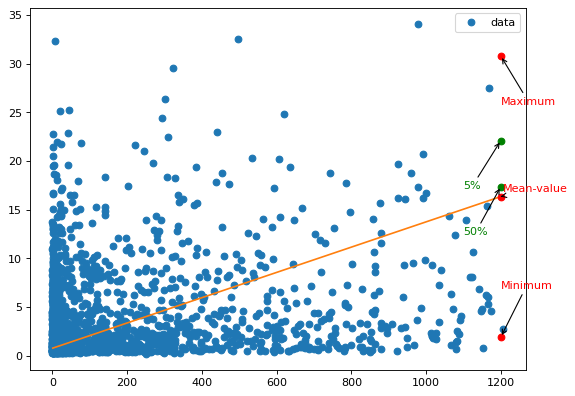

In [57]:
plot_show(1200)

CSO spills: 1000 m3/s
↓ River flow statistical data ↓
Maximum:  28.9 m3/s
Minimum:  1.9 m3/s
Mean:  15.4 m3/s
Probability of exceedance  21.158 m3/s is  5%
Probability of exceedance  19.221 m3/s is  10%
Probability of exceedance  17.805 m3/s is  20%
Probability of exceedance  16.425 m3/s is  50%
Probability of exceedance  15.693 m3/s is  90%


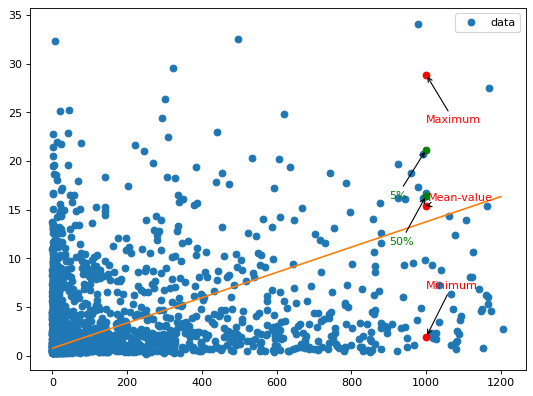

In [58]:
plot_show(1000)

CSO spills: 500 m3/s
↓ River flow statistical data ↓
Maximum:  22.7 m3/s
Minimum:  1.9 m3/s
Mean:  12.3 m3/s
Probability of exceedance  18.058 m3/s is  5%
Probability of exceedance  16.121 m3/s is  10%
Probability of exceedance  14.705 m3/s is  20%
Probability of exceedance  13.325 m3/s is  50%
Probability of exceedance  12.593 m3/s is  90%


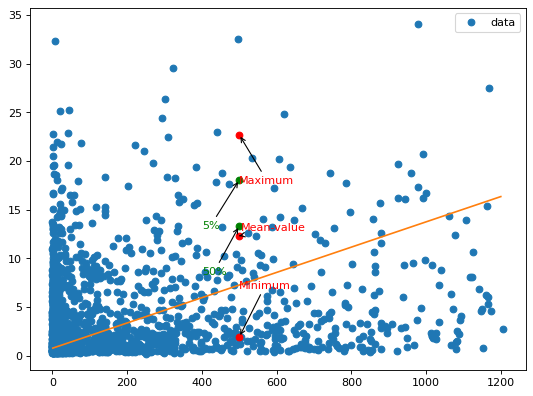

In [59]:
plot_show(500)

CSO spills: 100 m3/s
↓ River flow statistical data ↓
Maximum:  12.0 m3/s
Minimum:  1.9 m3/s
Mean:  6.95 m3/s
Probability of exceedance  12.708 m3/s is  5%
Probability of exceedance  10.771 m3/s is  10%
Probability of exceedance  9.355 m3/s is  20%
Probability of exceedance  7.975 m3/s is  50%
Probability of exceedance  7.243 m3/s is  90%


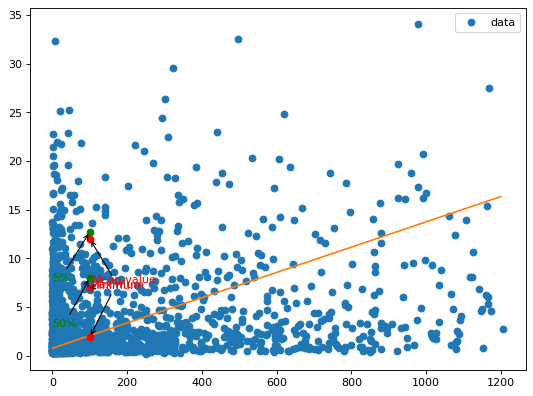

In [60]:
plot_show(100)

CSO spills: 50 m3/s
↓ River flow statistical data ↓
Maximum:  7.7 m3/s
Minimum:  1.9 m3/s
Mean:  4.8 m3/s
Probability of exceedance  10.558 m3/s is  5%
Probability of exceedance  8.621 m3/s is  10%
Probability of exceedance  7.205 m3/s is  20%
Probability of exceedance  5.825 m3/s is  50%
Probability of exceedance  5.093 m3/s is  90%


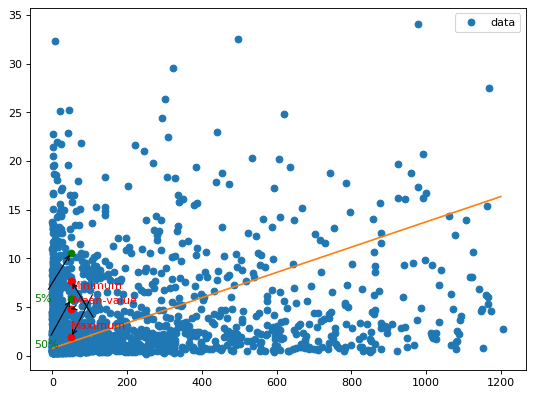

In [61]:
plot_show(50)

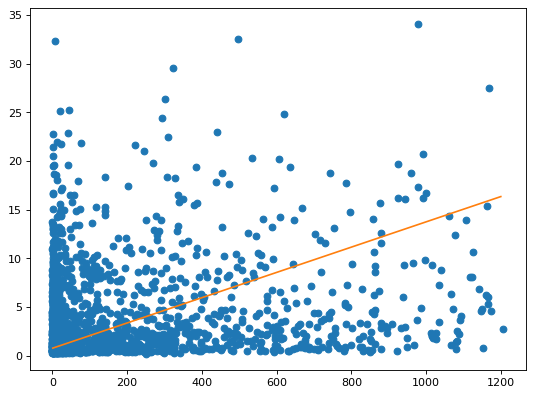

In [45]:
p1 = [1, function(1,0.8,1659,1.9)[0]] 
p2 = [1200, function(1200,0.8,1659,1.9)[0]] 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_hr_nonzero['CSOspills'], df_hr_nonzero['riverflow'], 'o', label='data')
plt.plot([1,1200],[function(1,0.8,1659,1.9)[0],function(1200,0.8,1659,1.9)[0]])

Text(0, 0.5, 'River flow')

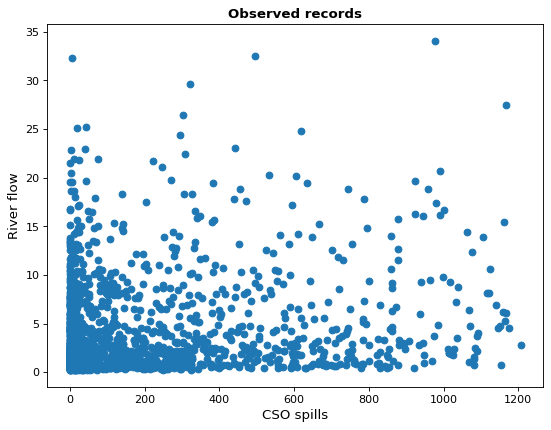

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_hr_nonzero['CSOspills'], df_hr_nonzero['riverflow'], 'o', label='data')
plt.title('Observed records', weight='bold')
plt.xlabel('CSO spills', fontsize=12)
plt.ylabel('River flow', fontsize=12)

In [33]:
df = pd.read_csv('df_rf_filled.csv')

In [34]:
df = df.drop('cso15',axis=1)
df = df.drop('cso18',axis=1)

In [35]:
df['Time'] = pd.to_datetime(df['Time'], format = '%Y/%m/%d %H:%M')

In [36]:
df

,Time,riverflow,CSOspills
0,2003-01-01 00:00:00,1.195,0.0
1,2003-01-01 00:15:00,1.240,0.0
2,2003-01-01 00:30:00,1.195,0.0
3,2003-01-01 00:45:00,1.195,0.0
4,2003-01-01 01:00:00,1.195,0.0
...,...,...,...
350725,2013-01-01 09:15:00,4.673,0.0
350726,2013-01-01 09:30:00,4.643,0.0
350727,2013-01-01 09:45:00,4.619,0.0
350728,2013-01-01 10:00:00,4.607,0.0


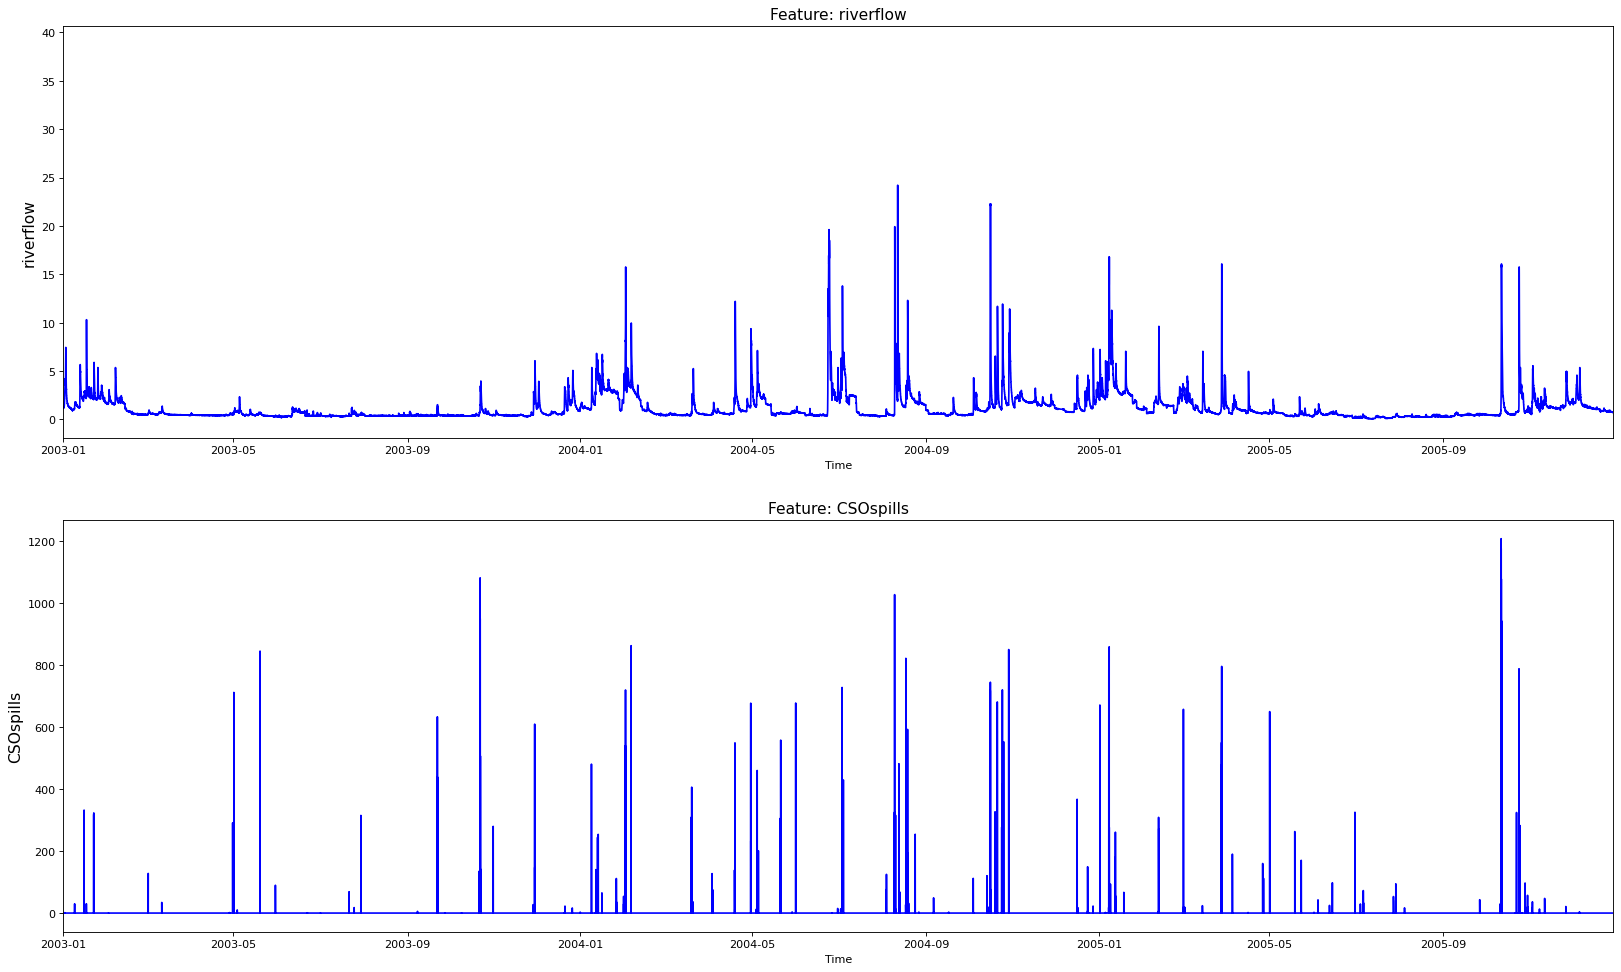

In [37]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

for i, column in enumerate(df.drop('Time', axis=1).columns):
    sns.lineplot(x=df['Time'], y=df[column].fillna(method='ffill'), ax=ax[i], color='blue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2003, 1, 1), date(2005, 12, 30)])

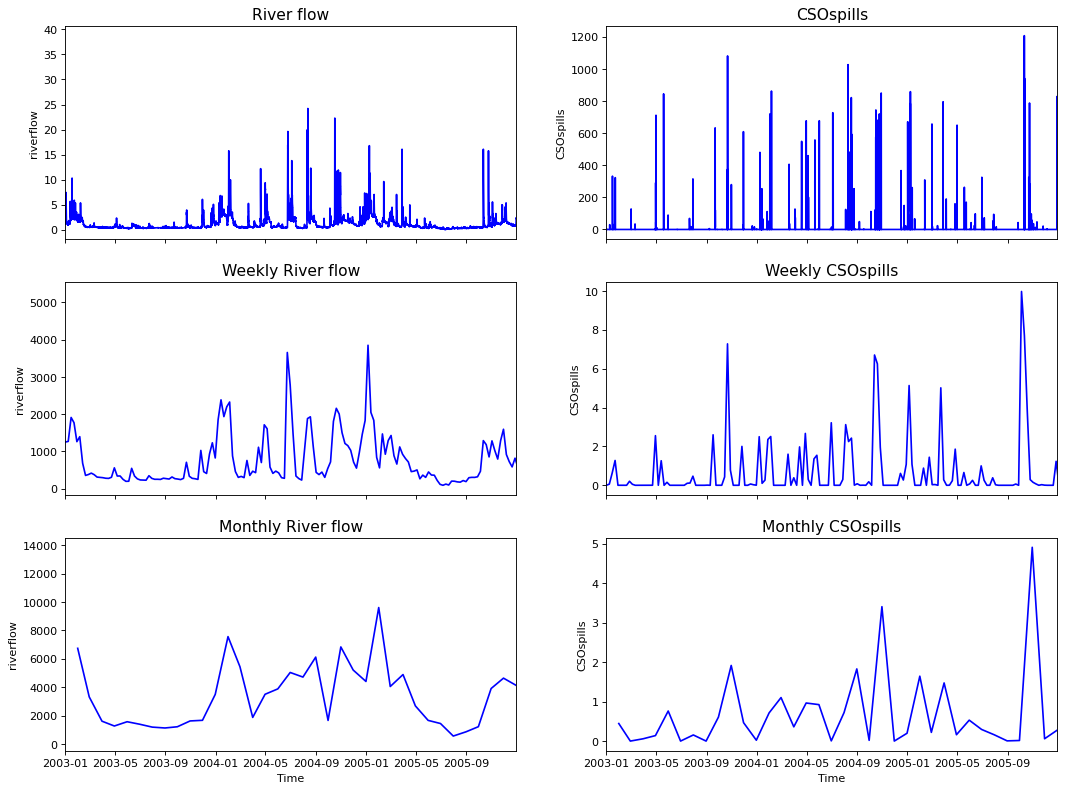

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['Time'], df['riverflow'], color='blue', ax=ax[0, 0])
ax[0, 0].set_title('River flow', fontsize=14)

resampled_df = df[['Time','riverflow']].resample('7D', on='Time').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Time'], resampled_df['riverflow'], color='blue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly River flow', fontsize=14)

resampled_df = df[['Time','riverflow']].resample('M', on='Time').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Time'], resampled_df['riverflow'], color='blue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly River flow', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2003, 1, 1), date(2005, 12, 31)])

sns.lineplot(df['Time'], df['CSOspills'], color='blue', ax=ax[0, 1])
ax[0, 1].set_title('CSOspills', fontsize=14)

resampled_df = df[['Time','CSOspills']].resample('7D', on='Time').mean().reset_index(drop=False)
sns.lineplot(resampled_df['Time'], resampled_df['CSOspills'], color='blue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly CSOspills', fontsize=14)

resampled_df = df[['Time','CSOspills']].resample('M', on='Time').mean().reset_index(drop=False)
sns.lineplot(resampled_df['Time'], resampled_df['CSOspills'], color='blue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly CSOspills', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2003, 1, 1), date(2005, 12, 31)])
plt.show()

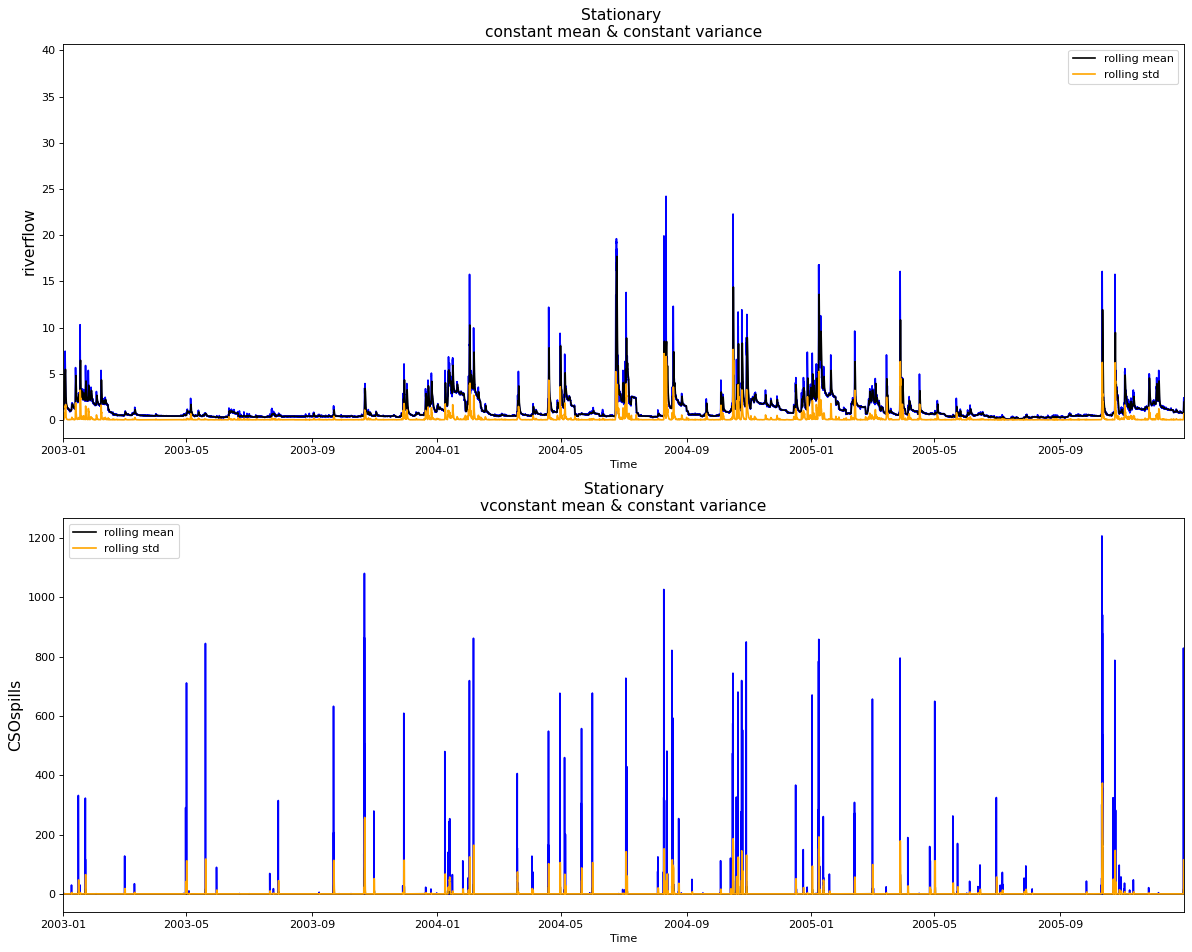

In [46]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['Time'], y=df['riverflow'], ax=ax[0], color='blue')
sns.lineplot(x=df['Time'], y=df['riverflow'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['Time'], y=df['riverflow'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Stationary \nconstant mean & constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='riverflow', fontsize=14)
ax[0].set_xlim([date(2003, 1, 1), date(2005, 12, 31)])

sns.lineplot(x=df['Time'], y=df['CSOspills'], ax=ax[1], color='blue')
sns.lineplot(x=df['Time'], y=df['CSOspills'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['Time'], y=df['CSOspills'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title(' Stationary \nvconstant mean & constant variance', fontsize=14)
ax[1].set_ylabel(ylabel='CSOspills', fontsize=14)
ax[1].set_xlim([date(2003, 1, 1), date(2005, 12, 31)])

plt.tight_layout()
plt.show()

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
core_columns =  [
    "CSOspills",
    "riverflow"
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=7, model='additive')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal
   

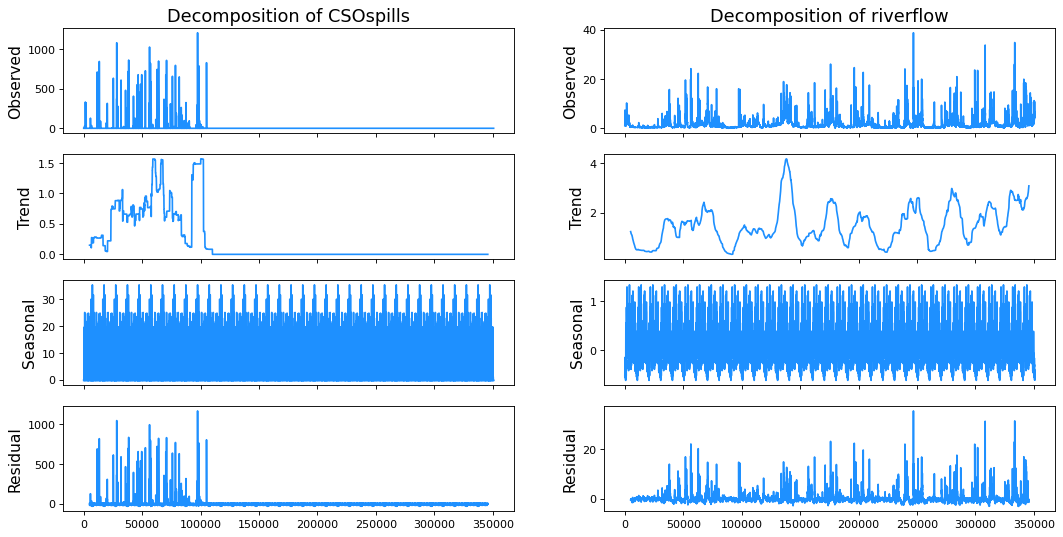

In [45]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['CSOspills', 'riverflow']):
    
    res = seasonal_decompose(df[column], period=10000, model='additive')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

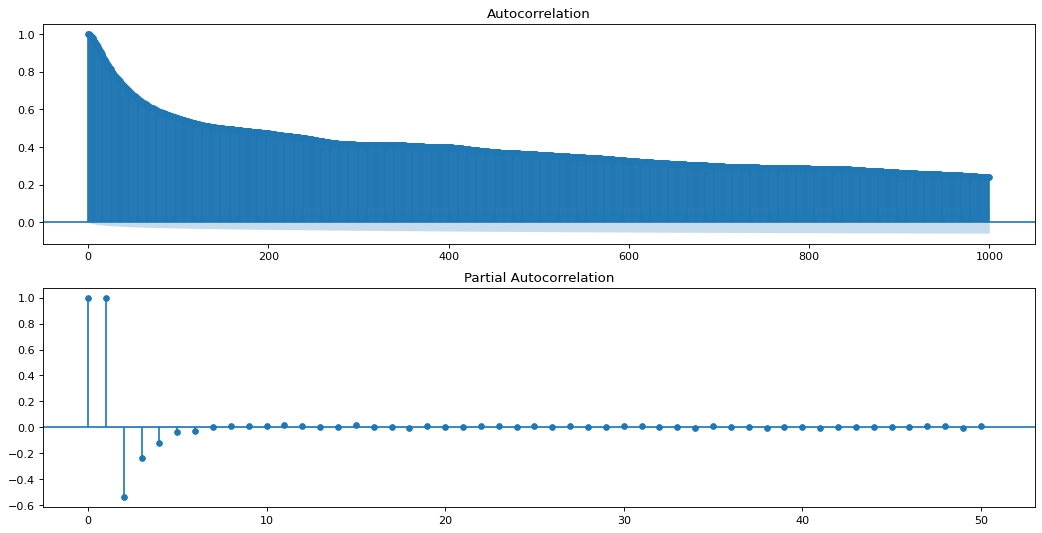

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['riverflow'], lags=1000, ax=ax[0])
plot_pacf(df['riverflow'], lags=50, ax=ax[1])

plt.show()

In [49]:
X = df['CSOspills']
y = df['riverflow']

train_size = int(0.80 * len(df))
test_size = len(df) - train_size

univariate_df = df[['CSOspills', 'riverflow']].copy()
univariate_df.columns = ['cs', 'y']

train = univariate_df.iloc[:train_size, :]

X_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
X_test, y_test = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

280584 70146
280584 70146


In [54]:
from statsmodels.tsa.arima_model import ARMA
# Fit model
model = ARMA(y_train, order=(7,0))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(70146)

# Calcuate metrics
score_mae = mean_absolute_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))

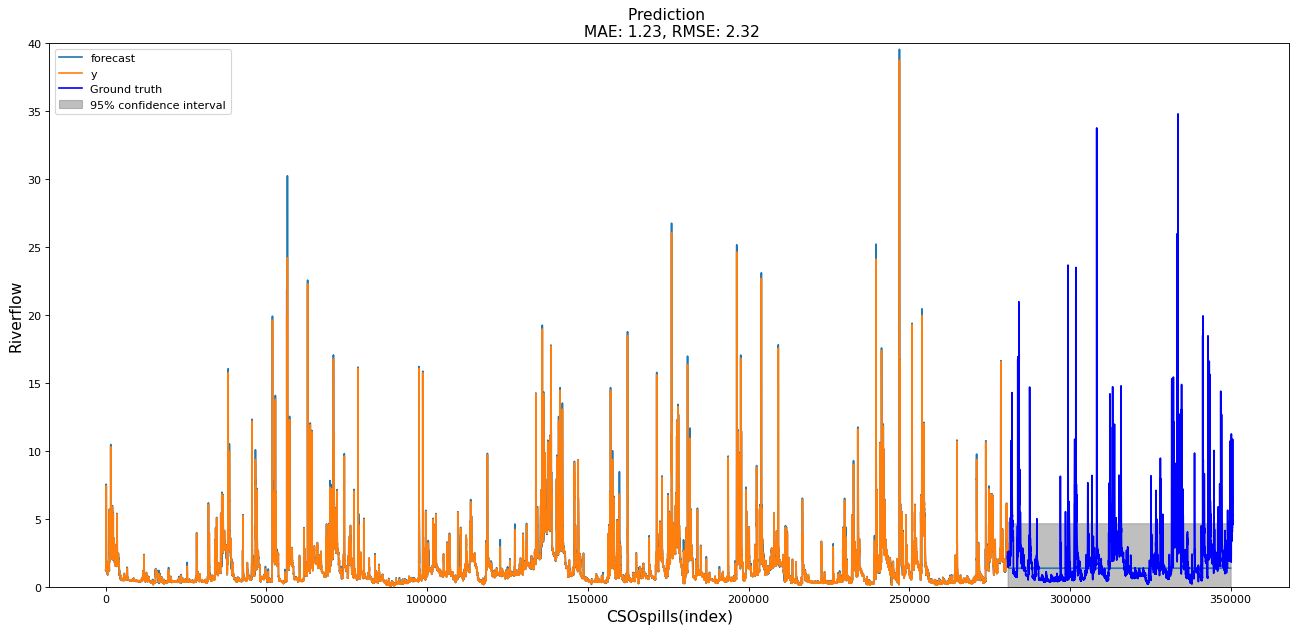

In [62]:
f, ax = plt.subplots(1)
f.set_figheight(9)
f.set_figwidth(20)

model_fit.plot_predict(1, 350000, ax=ax)
sns.lineplot(x=X_test.index, y=y_test['y'], ax=ax, color='Blue', label='Ground truth') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='CSOspills(index)', fontsize=14)
ax.set_ylabel(ylabel='Riverflow', fontsize=14)

ax.set_ylim(0, 40)
plt.show()

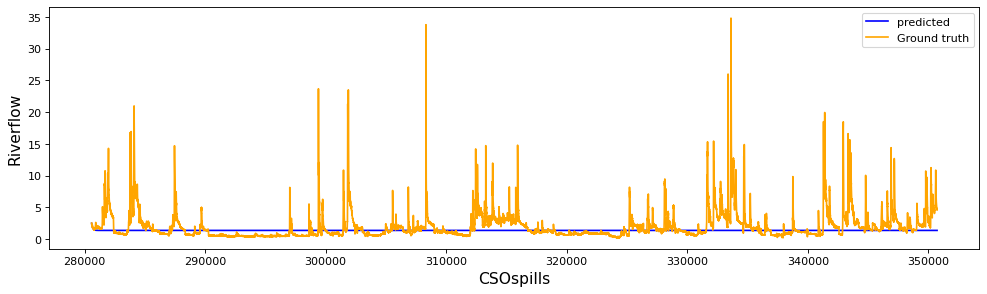

In [63]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=X_test.index, y=y_pred, ax=ax, color='blue', label='predicted') 
sns.lineplot(x=X_test.index, y=y_test['y'], ax=ax, color='orange', label='Ground truth') 

ax.set_xlabel(xlabel='CSOspills', fontsize=14)
ax.set_ylabel(ylabel='Riverflow', fontsize=14)

plt.show()

In [64]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:               280584
Model:                     ARMA(7, 0)   Log Likelihood              359301.139
Method:                       css-mle   S.D. of innovations              0.067
Date:                Sat, 14 Aug 2021   AIC                        -718584.279
Time:                        04:26:22   BIC                        -718489.377
Sample:                             0   HQIC                       -718556.751
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3660      0.045     30.665      0.000       1.279       1.453
ar.L1.y        1.3751      0.002    728.376      0.000       1.371       1.379
ar.L2.y       -0.1773      0.003    -55.246      0.0

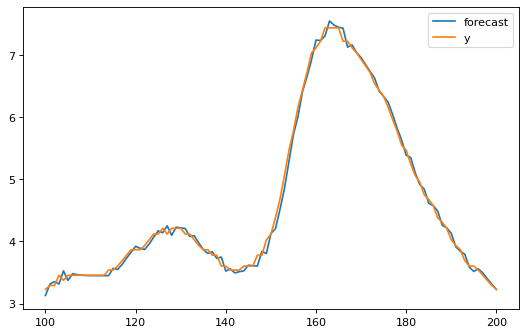

In [65]:
model_fit.plot_predict(100,200,dynamic=False)
plt.show()